# Vecchia approximation

In [1]:
import gstlearn as gl
import gstlearn.plot as gp
import numpy as np

ndim = 2
err = gl.defineDefaultSpace(gl.ESpaceType.RN, ndim)

This script is meant to check Kriging using Vecchia approximation. It provides a comparison with Kriging using a traditional
approach.

A Model is created which:
- allows to simulate values at the conditioning data points
- is used for subsequent Kriging operations

In [2]:
range = 0.3
sill = 12.
model = gl.Model.createFromParam(gl.ECov.CUBIC, range=range, sill=sill)

The set of conditioning data points is generated at random into the 1 by 1 square. Simulation at the conditioning data points using the Turning Bands method

In [3]:
ndat = 100
data = gl.Db.createFillRandom(ndat, ndim, 0)

err = gl.simtub(None, data, model)

A Grid is created which covers the area of the conditioning data set.

In [4]:
nmesh = 100
grid = gl.DbGrid.create([nmesh, nmesh], dx=[1./nmesh, 1./nmesh])

## Standard Kriging

The standard Kriging requires the definition of a Neighborhood. Due to the reasonably small number of data, a **Unique** neighborhood has been chosen.

In [5]:
neighU = gl.NeighUnique.create(ndim)

In [6]:
err = gl.kriging(data, grid, model, neighU)

Display the estiamtion together with the conditioning information.

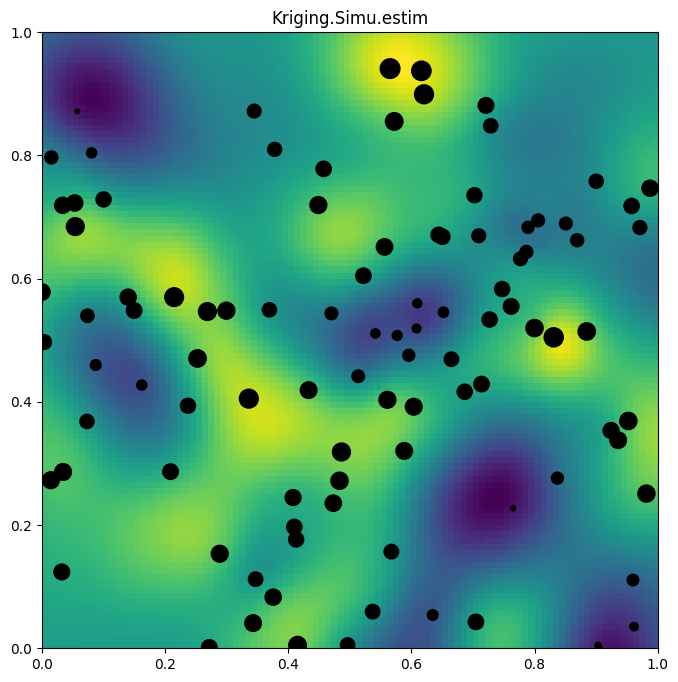

In [7]:
ax = gp.raster(grid, name="Kriging.Simu.estim")
ax = gp.symbol(data, nameSize="Simu", c="black")

## Kriging with Vecchia approximation

Now we can also perform the estimation by Kriging using the Vecchia approximation.
We do not need any neighborhood definition now; we must simply define the number of already estimated samples to be considered at each step.

In [8]:
nb_neigh = 10

In [9]:
err = gl.krigingVecchia(data, grid, model, nb_neigh)

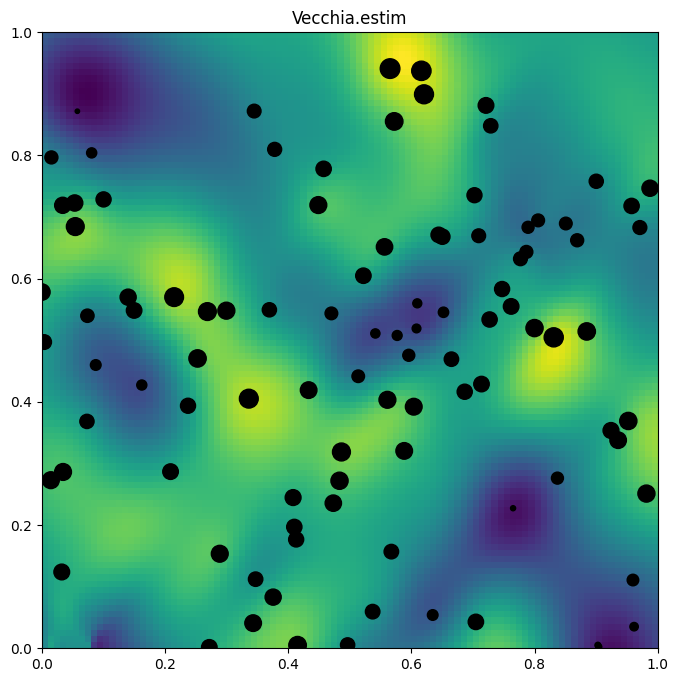

In [10]:
ax = gp.raster(grid, name="Vecchia.estim")
ax = gp.symbol(data, nameSize="Simu", c="black")

Compare the two estimators in a scatter plot

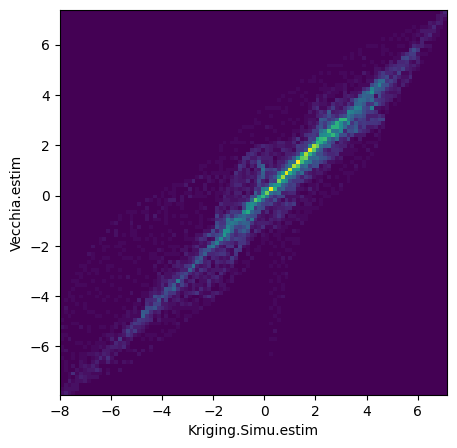

In [11]:
ax = gp.correlation(grid, namex="Kriging.Simu.estim", namey="Vecchia.estim", bins=100)

## Large data set

In this paragraph, we consider a very large data set (10000 samples). The traditional Kriging cannot be applied, at least using a Unique Neighborhood. The interesting property is to check that the Kriging using Vecchia approximation (with a small number of already processed samples) is still active and give reasonable results.

In [14]:
ndat = 10000
data = gl.Db.createFillRandom(ndat, ndim, 0)
nmesh = 100
grid = gl.DbGrid.create([nmesh, nmesh], dx=[1./nmesh, 1./nmesh])

err = gl.simtub(None, data, model)

In [15]:
nb_neigh = 20
err = gl.krigingVecchia(data, grid, model, nb_neigh)

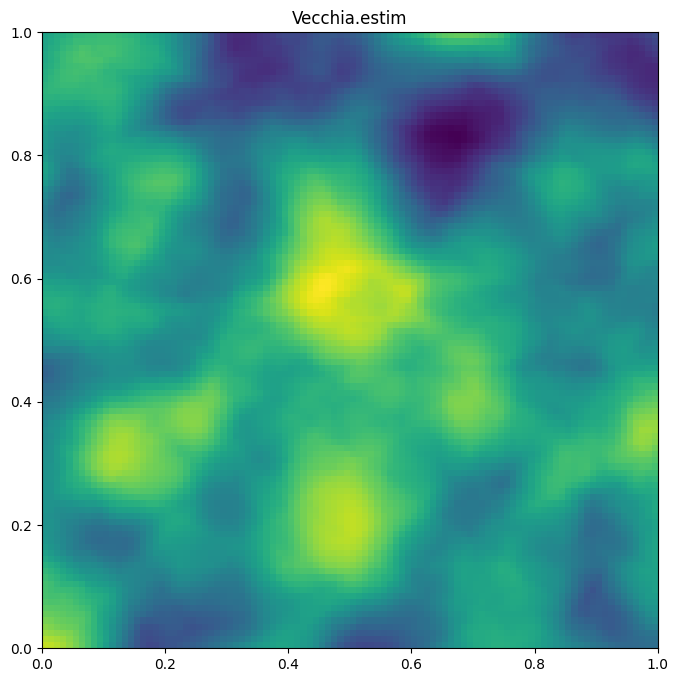

In [23]:
ax = gp.raster(grid, name="Vecchia.estim")

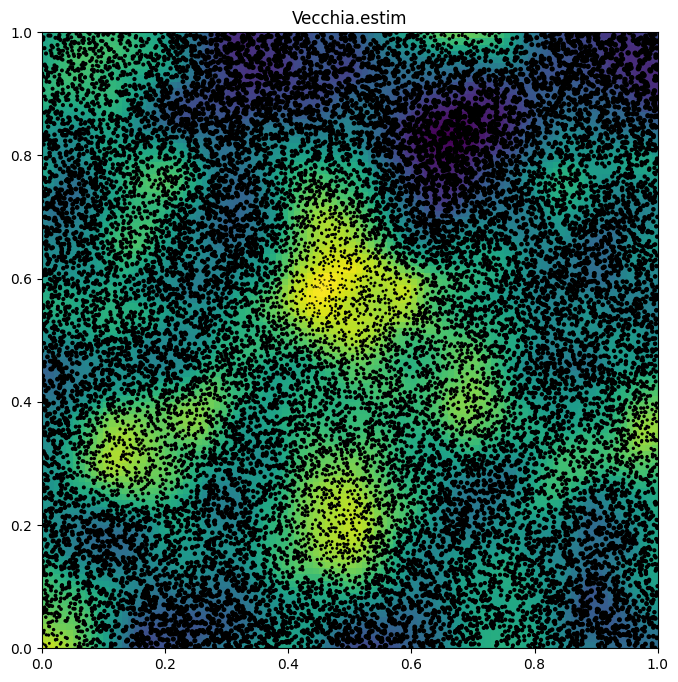

In [24]:
ax = gp.raster(grid, name="Vecchia.estim")
ax = gp.symbol(data, nameSize="Simu", c="black", sizmax=0.01)